In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from models.url_ml_catboost_classifier import SingletonURLMLCatBoostClassifier
from models.url_ml_desicion_tree_classifier import SingletonURLMLDecisionTreeClassifier
from models.url_ml_gradient_boosting_classifier import (
    SingletonURLMLGradientBoostingClassifier,
)
from models.url_ml_knn_classifier import SingletonURLMLKNNClassifier
from models.url_ml_logistic_regression_classifier import (
    SingletonURLMLLogisticRegressionClassifier,
)
from models.url_ml_mlp_classifier import SingletonURLMLMLPClassifier
from models.url_ml_naive_bayes_classifier import SingletonURLMLNaiveBayesClassifier
from models.url_ml_random_forest import SingletonURLMLRandomForestClassifier
from models.url_ml_svm_classifier import SingletonURLMLSVMClassifier
from utils.url_utils import load_data_from_csv
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score

/Users/ngosangns/Github/spam-sms-detector-1123/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def evaluate_classifiers(classifiers, X_train, Y_train, X_test, Y_test, is_training):
    accuracies = []
    f1_scores = []
    recalls = []
    precisions = []
    
    for classifier in classifiers:
        if is_training:
            classifier.train(X_train.copy(), Y_train.copy())
            classifier.save()
        else:
            classifier.load()

        print(f"Evaluating {classifier.model_name}...")
        Y_pred = classifier.predict(X_test.copy())
        
        accuracy = accuracy_score(Y_test.copy(), Y_pred)
        f1 = f1_score(Y_test.copy(), Y_pred, average='weighted')
        recall = recall_score(Y_test.copy(), Y_pred, average='weighted')
        precision = precision_score(Y_test.copy(), Y_pred, average='weighted')
        
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")
        
        accuracies.append(accuracy * 100)
        f1_scores.append(f1 * 100)
        recalls.append(recall * 100)
        precisions.append(precision * 100)
    
    return accuracies, f1_scores, recalls, precisions

def plot_metrics(model_names, accuracies, f1_scores, recalls, precisions):
    metrics_df = pd.DataFrame({
        'Model': model_names,
        'Accuracy (%)': accuracies,
        'F1 Score (%)': f1_scores,
        'Recall (%)': recalls,
        'Precision (%)': precisions
    })
    display(metrics_df)

def plot_accuracies(model_names, accuracies):
    accuracies = [accuracy[0] for accuracy in accuracies]
    plt.figure(figsize=(12, 6))
    plt.bar(model_names, accuracies)
    plt.xlabel("Model")
    plt.ylabel("Accuracy (%)")
    plt.title("Model Comparison")
    for i, accuracy in enumerate(accuracies):
        plt.text(i, accuracy + 1, f"{accuracy:.2f}%", ha="center", va="bottom")
    plt.show()

0:	learn: 0.5487237	total: 61.6ms	remaining: 1m 1s
1:	learn: 0.4349354	total: 63.7ms	remaining: 31.8s
2:	learn: 0.3609245	total: 65.5ms	remaining: 21.8s
3:	learn: 0.3050830	total: 67.4ms	remaining: 16.8s
4:	learn: 0.2766622	total: 69.3ms	remaining: 13.8s
5:	learn: 0.2475478	total: 71.2ms	remaining: 11.8s
6:	learn: 0.2286636	total: 73.1ms	remaining: 10.4s
7:	learn: 0.2138756	total: 74.9ms	remaining: 9.29s
8:	learn: 0.2013642	total: 77.7ms	remaining: 8.55s
9:	learn: 0.1896379	total: 79.6ms	remaining: 7.88s
10:	learn: 0.1819537	total: 81.5ms	remaining: 7.33s
11:	learn: 0.1767868	total: 83.4ms	remaining: 6.87s
12:	learn: 0.1727735	total: 85.4ms	remaining: 6.49s
13:	learn: 0.1682579	total: 87.4ms	remaining: 6.15s
14:	learn: 0.1641760	total: 89.3ms	remaining: 5.86s
15:	learn: 0.1614218	total: 91.2ms	remaining: 5.61s
16:	learn: 0.1558970	total: 93.2ms	remaining: 5.39s
17:	learn: 0.1535882	total: 95.2ms	remaining: 5.19s
18:	learn: 0.1514228	total: 97.3ms	remaining: 5.02s
19:	learn: 0.1482581	t

,Model,Accuracy (%),F1 Score (%),Recall (%),Precision (%)
0,catboost,97.241067,97.238377,97.241067,97.24738


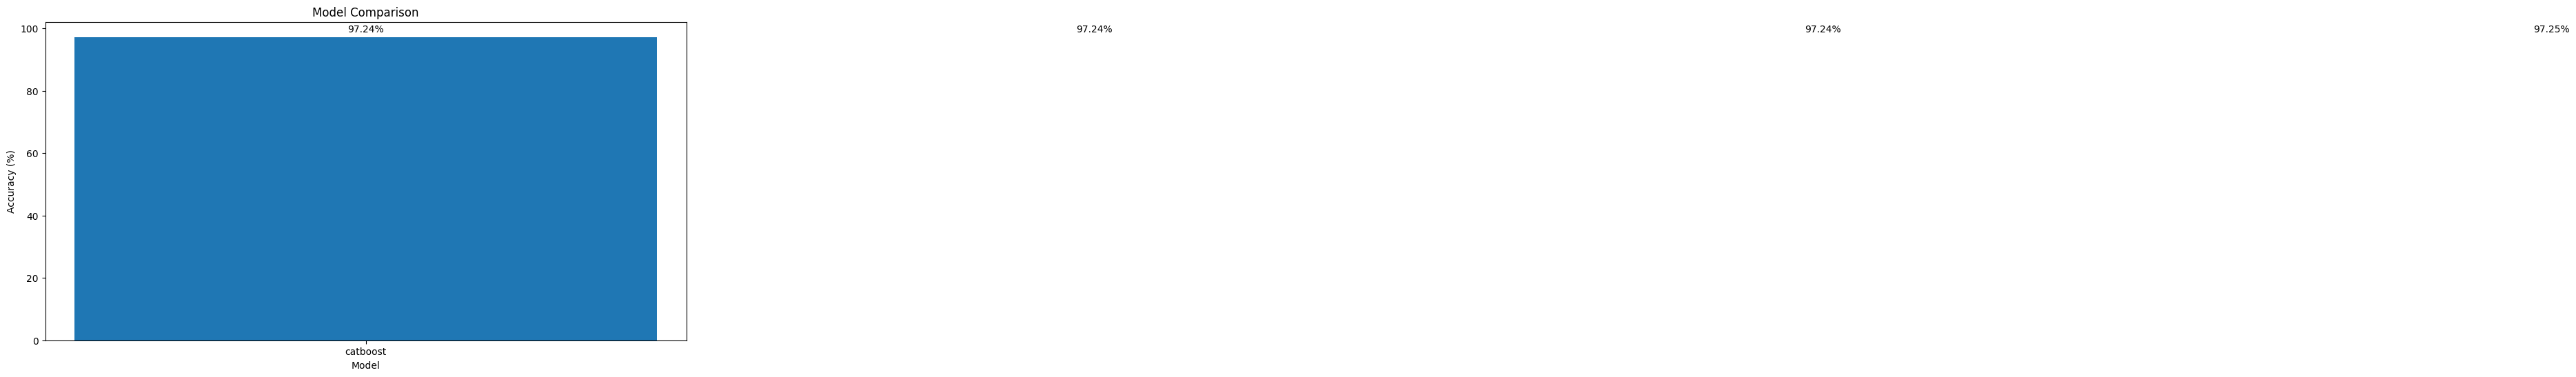

In [3]:
URL_CSV_PATH = "./data/url-data.csv"
MODEL_DIR = "./trained_models"
IS_TRAINING = True

classifiers = [
    # SingletonURLMLSVMClassifier(MODEL_DIR),
    # SingletonURLMLRandomForestClassifier(MODEL_DIR),
    # SingletonURLMLLogisticRegressionClassifier(MODEL_DIR),
    # SingletonURLMLKNNClassifier(MODEL_DIR),
    # SingletonURLMLGradientBoostingClassifier(MODEL_DIR),
    SingletonURLMLCatBoostClassifier(MODEL_DIR),
    # SingletonURLMLDecisionTreeClassifier(MODEL_DIR),
    # SingletonURLMLMLPClassifier(MODEL_DIR),
    # SingletonURLMLNaiveBayesClassifier(MODEL_DIR),
]
model_names = [classifier.model_name for classifier in classifiers]

X, Y = load_data_from_csv(URL_CSV_PATH)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
accuracies = evaluate_classifiers(
    classifiers, X_train, Y_train, X_test, Y_test, IS_TRAINING
)

plot_metrics(model_names, *accuracies)

plot_accuracies(model_names, accuracies)